## QUESTION 1

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1a

Original Equation:
$$\prod_{i = 1}^{n} 2 \alpha x e^{- \alpha x^{2}}$$
Taking the natural log:
$$\ln(\prod_{i = 1}^{n} 2 \alpha x e^{- \alpha x^{2}})$$
Equals:
$$\sum_{i = 1}^{n} \ln(2) + \ln(\alpha) + \ln(x_i) - \alpha x_i^{2} $$
Taking the derivative with respect to alpha:
$$d/d\alpha(\sum_{i = 1}^{n} \ln(2 \alpha x_i) - \alpha x_i^{2}) = 0$$
$$\sum_{i = 1}^{n}[(1/\alpha) - x_i^{2}] = 0$$
Incorporating sum:
$$n/\alpha - \sum_{i = 1}^{n} x_i^{2} = 0$$
Simplifying and finding alpha:
$$n/\alpha = \sum_{i = 1}^{n} x_i^{2}$$
$$n = \sum_{i = 1}^{n} x_i^{2} * \alpha$$
$$\alpha = n/ \sum_{i = 1}^{n} x_i^{2}$$

## 1b

In [5]:
traffic = pd.read_csv('traffic.csv', header = None)
traffic

,0
0,0.565706
1,1.030801
2,0.719174
3,0.970237
4,0.940219
...,...
9995,0.520613
9996,0.761953
9997,1.112560
9998,0.065503


In [6]:
traffic_squared = traffic ** 2
summation = traffic_squared.sum()
alpha = 10000/summation
alpha

0    1.165723
dtype: float64

## 1c

(array([3.90766287e-01, 8.18807579e-01, 8.74098834e-01, 5.96089432e-01,
        2.78320027e-01, 1.06544385e-01, 3.07518780e-02, 9.00812586e-03,
        1.24250012e-03, 6.21250060e-04]),
 array([0.0091726 , 0.33110416, 0.65303572, 0.97496728, 1.29689884,
        1.61883039, 1.94076195, 2.26269351, 2.58462507, 2.90655663,
        3.22848819]),
 <BarContainer object of 10 artists>)

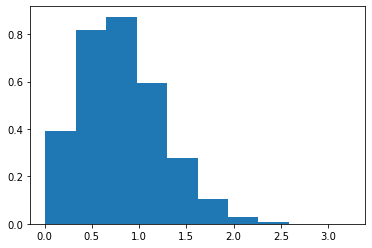

In [7]:
plt.hist(traffic, density = True )

In [8]:
def probability(data, alpha):
    a = 2 * alpha * data
    neg_alpha = -alpha
    data_squared = data ** 2
    euler = np.exp(neg_alpha * data_squared)
    proba = a * euler
    return proba

In [9]:
traffic.columns
traffic.rename(columns = {0:'Numbers'}, inplace = True)
traffic

,Numbers
0,0.565706
1,1.030801
2,0.719174
3,0.970237
4,0.940219
...,...
9995,0.520613
9996,0.761953
9997,1.112560
9998,0.065503


In [10]:
traffic['alpha'] = traffic.apply(lambda x: probability(traffic['Numbers'], 1.165723))
traffic

,Numbers,alpha
0,0.565706,0.908237
1,1.030801,0.696412
2,0.719174,0.917513
3,0.970237,0.754959
4,0.940219,0.782183
...,...,...
9995,0.520613,0.884958
9996,0.761953,0.902878
9997,1.112560,0.612769
9998,0.065503,0.151954


In [11]:
traffic['Numbers'].max()

3.228488187212793

In [12]:
x = np.arange(0,3.5,0.001)
x

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 3.497e+00, 3.498e+00,
       3.499e+00])

In [13]:
random_set = pd.DataFrame({'random': x})
random_set

,random
0,0.000
1,0.001
2,0.002
3,0.003
4,0.004
...,...
3495,3.495
3496,3.496
3497,3.497
3498,3.498


In [14]:
random_set['alpha'] = random_set.apply(lambda x: probability(random_set['random'], 1.165723))
random_set

,random,alpha
0,0.000,0.000000
1,0.001,0.002331
2,0.002,0.004663
3,0.003,0.006994
4,0.004,0.009326
...,...,...
3495,3.495,0.000005
3496,3.496,0.000005
3497,3.497,0.000005
3498,3.498,0.000005


<AxesSubplot:xlabel='random', ylabel='alpha'>

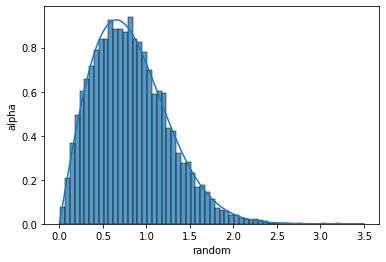

In [15]:
sns.lineplot(x= 'random', y = 'alpha', data = random_set)
sns.histplot(x= 'Numbers', data = traffic, stat = 'density')

## QUESTION 2
Write a Python function that computes the probability function for a hypergeometric random
variable, X. (See the class notes and Wikipedia page for this formula.) Your function should
take inputs:


In [2]:
from math import comb

In [3]:
def prob(NumBits, NumBits1, NumBitsDrawn, NumBitsDrawn1): #N,K,n,k
    a = comb(NumBits1, NumBitsDrawn1)
    b = comb(NumBits - NumBits1, NumBitsDrawn - NumBitsDrawn1)
    denominator = comb(NumBits, NumBitsDrawn)
    numerator = a * b
    probability = numerator/denominator
    return probability

## 2a 

In [4]:
print(prob(8,4,4,2)) #probability for k =2
print(prob(8,4,4,3)) #k = 3
print(prob(8,4,4,4)) #k = 4

0.5142857142857142
0.22857142857142856
0.014285714285714285


## 2b

In [6]:
print(prob(100,10,50,10))

0.0005934196725858287


The probability that I will capture all 10 packets from the hackers is 0.059 percent.

## 2c

In [20]:
sum = 0
for i in range(5,11):
    sum += prob(100,10,50,i)

print(sum)

0.6296667731127675


The probability that I will capture at least half of the hacker's packets is 62.97 percent.

## QUESTION 3

In [21]:
cardiac = pd.read_csv('cardiac.csv')
cardiac

,bhr,basebp,basedp,pkhr,sbp,dp,dose,maxhr,%mphr(b),mbp,...,phat,event(#),mics,deltaEF,newpkmphr,gdpkmphr,gdmaxmphr,gddpeakdp,gdmaxdp,hardness
0,92,103,9476,114,86,9804,40,100,74,121,...,0.500272,0,1,5,84.44444,0,0,0,0,2
1,62,139,8618,120,158,18960,40,120,82,158,...,0.548361,1,1,1,81.63265,0,0,0,0,0
2,62,139,8618,120,157,18840,40,120,82,157,...,0.548361,1,1,1,81.63265,0,0,0,0,0
3,93,118,10974,118,105,12390,30,118,72,105,...,0.646591,0,1,15,72.39264,0,0,0,0,2
4,89,103,9167,129,173,22317,40,129,69,176,...,0.522896,0,1,12,69.35484,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,71,150,10650,112,140,15680,35,108,72,160,...,0.709618,0,1,11,74.66667,0,0,0,0,2
554,77,132,10164,112,133,14896,25,109,75,140,...,0.558987,1,1,-4,76.71233,0,0,0,0,0
555,78,100,7800,123,102,12546,40,119,76,112,...,0.709618,1,1,17,78.84615,0,0,0,0,1
556,59,130,7670,107,70,7490,40,106,71,115,...,0.747720,1,1,11,71.33333,0,0,0,0,0


## 3a

In [22]:
pd.crosstab(cardiac.gender, cardiac.hxofHT) #Got this idea from Piazza

hxofHT,0,1
gender,,
0,144,76
1,249,89


## 3b

In [23]:
print(prob(558,220,393,144))

0.008846092806850215


## 3c

Since null hypothesis can be though of as the "default position," it would be that women have hypertension equally as likely as men. 

## 3d

In [33]:
women_with_hypo = 249
women_without_hypo = 89
men_with_hypo = 144
men_without_hypo = 76

K = women_with_hypo + men_with_hypo
n = women_with_hypo + women_without_hypo
sum = 0
    
while(women_without_hypo != 0):
    sum += prob(558,K,n,women_with_hypo)
    women_without_hypo -=1
    men_with_hypo -=1
    women_with_hypo += 1
    
print(sum)

0.024039690892811647


Since the p-value is lower than 0.05, we can reject the null hypothesis.